##### Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv(r"C:\Users\thars\Downloads\INR-USD\INR-USD.csv")
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000     0.0
1  2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000     0.0
2  2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002     0.0
3  2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999     0.0
4  2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001     0.0


In [4]:
# let's check if the dataset contains Null's
data.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [5]:
# drop null's
data = data.dropna()

In [6]:
# let's check the descriptive statistics
print(data.describe())

              Open         High          Low        Close    Adj Close  Volume
count  1013.000000  1013.000000  1013.000000  1013.000000  1013.000000  1013.0
mean     58.035208    58.506681    57.654706    58.056509    58.056509     0.0
std      12.614635    12.716632    12.565279    12.657407    12.657407     0.0
min      38.995998    39.334999    38.979000    39.044998    39.044998     0.0
25%      45.508999    45.775002    45.231998    45.498001    45.498001     0.0
50%      59.702999    60.342999    59.209999    59.840000    59.840000     0.0
75%      68.508499    69.099998    68.250000    68.538002    68.538002     0.0
max      82.917999    83.386002    82.563004    82.932999    82.932999     0.0


##### USD – INR Conversion Rate Analysis

In [7]:
figure = px.line(data, x="Date",
                 y="Close",
                 title="USD - INR Conversion Rate Over Time")
figure.update_layout(xaxis_title="Time",
                     yaxis_title="Close Price")
figure.show()

In [8]:
# let's add a month and year column before moving forward
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month

print(data.head())

        Date       Open       High        Low      Close  Adj Close  Volume  \
0 2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000     0.0   
1 2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000     0.0   
2 2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002     0.0   
3 2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999     0.0   
4 2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001     0.0   

   Year  Month  
0  2003     12  
1  2003     12  
2  2003     12  
3  2003     12  
4  2003     12  


In [9]:
import plotly.graph_objects as go
import plotly.io as pio

#Calculate Yearly Growth
growth = data.groupby('Year').agg({'Close': lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[0]*100})
growth

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index,
                     y=growth["Close"],
                     name="Yearly Growth"))
fig.update_layout(title = "Yearly Growth OF USD - INR Conversion Rate",
                  xaxis_title="Year",
                  yaxis_title="Close",
                  width=900,
                  height=500)
pio.show(fig)


In [10]:
# Calculate Monthly Growth
data["Growth"] = data.groupby(["Year", "Month"])["Close"].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Group data by Month and Calclate Average Growth
grouped_data = data.groupby("Month").mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data["Month"],
    y=grouped_data["Growth"],
    marker_color=grouped_data["Growth"],
    hovertemplate="Month: %{x}<br> Average Growth: %{y:.2f}%<extra></extra>"
))

fig.update_layout(
    title="Aggregated Monthly Growth of USD - INR Conversion Rate",
    xaxis_title="Month",
    yaxis_title="Average Growth%(%)",
    width=900,
    height=500
)

pio.show(fig)

##### Forecasting Exchange Rates Using Time Series Forecasting

C:\Users\thars\AppData\Local\Temp\ipykernel_21260\4122914914.py:6: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



<Figure size 640x480 with 0 Axes>

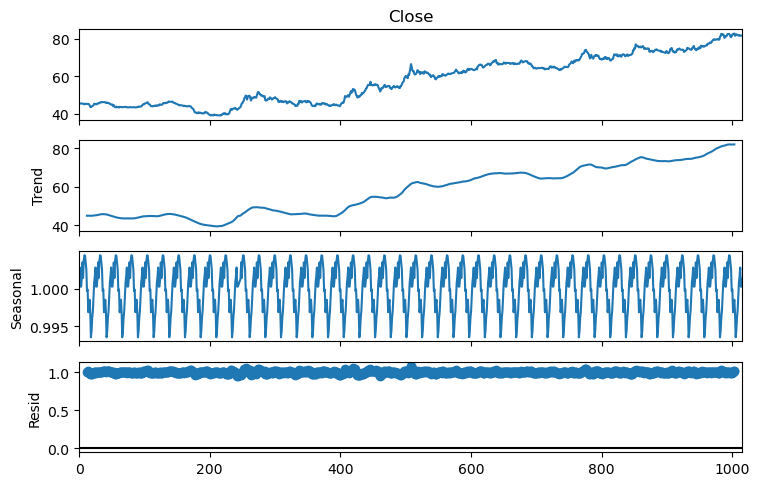

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model="multiplicative", period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8, 5)
fig.show()

In [12]:
from pmdarima.arima import auto_arima
model = auto_arima(data["Close"], seasonal=True, m=52, sppress_warnings=True)
print(model.order)

(2, 1, 0)


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p, d, q = 2, 1, 0
model = SARIMAX(data["Close"], order=(p,d,q),
                saeasonal_order=(p, d, q, 52))
fitted=model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1013
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -785.546
Date:                Sat, 19 Oct 2024   AIC                           1577.093
Time:                        09:52:21   BIC                           1591.852
Sample:                             0   HQIC                          1582.699
                               - 1013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0542      0.023      2.362      0.018       0.009       0.099
ar.L2          0.0670      0.022      2.995      0.003       0.023       0.111
sigma2         0.2765      0.008     33.180      0.0

c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['saeasonal_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



In [29]:
# here's how to make predictins about currency exchange rates
future_steps = 60
predictions = fitted.predict(len(data), len(data) + future_steps)
print(predictions)

1013    81.942504
1014    81.952758
1015    81.954152
1016    81.954915
1017    81.955050
          ...    
1069    81.955126
1070    81.955126
1071    81.955126
1072    81.955126
1073    81.955126
Name: predicted_mean, Length: 61, dtype: float64


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [32]:
# Here's how to visualize forecasted results:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index,
                         y=data["Close"],
                         mode="lines",
                         name="Training Data",
                         line=dict(color="gold")
                         ))
fig.add_trace(go.Scatter(x=predictions.index,
                         y=predictions,
                         mode="lines",
                         name="Predictions",
                         line=dict(color="green")))
fig.update_layout(title = "INR Rate - Training Data and Predictions",
                  xaxis_title="Date",
                  yaxis_title="Close",
                  legend_title="Data",
                  width=900,
                  height=500
                  )
pio.show(fig)